In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date

import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
# Setting up 'requests' to make HTTPS requests properly takes some extra steps... we'll skip them for now.
requests.packages.urllib3.disable_warnings()
# Import all modules that are required
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def get_data(url):
  snapshot_url = url
  snapshot = requests.get(snapshot_url)
  soup = BeautifulSoup(snapshot.text,'html.parser')
  #card_titles = soup.select('.Card-title')
  card_titles = soup.select('.Card-titleContainer')
  card_times = soup.select('.Card-time')
  card_classes = soup.select('.Card-eyebrow')
  matrix = []
  class_url = url.split('/')[-2]
  for i in range(0,len(card_titles)):
    d = card_times[i].text
    date_list=[]
    if 'Ago' in d or 'min' in d or 'sec' in d or 'hour' in d or 'ago' in d:
      today = date.today()
      date_list=[today.day,today.month]
    else:
      pom = d.split(' ')
      date_list = [int(pom[2][:-2]),datetime.strptime(pom[1],'%b').month]
    redica = [card_titles[i].select_one('a').text,card_times[i].text,date_list[0],date_list[1]]
    if i<5:
      redica.append('Top news ' +  class_url)
    else:
      if(class_url=='finance'):
        redica.append(card_classes[i-6].select_one('div').text)
      else:
        redica.append(card_classes[i-5].select_one('div').text)
    matrix.append(redica)
  df = pd.DataFrame(np.array(matrix),columns = ['Title','Date','Day','Month','Class'])
  return df

In [ ]:
df_finance = get_data('https://www.cnbc.com/finance/')

In [ ]:
df_health = get_data('https://www.cnbc.com/health-and-science/')

In [ ]:
df_finance


,Title,Date,Day,Month,Class
0,Ripple CEO says SEC has lost sight of mission ...,"Sat, Nov 11th 2023",11,11,Top news finance
1,Fed's Mary Daly says it's ‘too early to declar...,"Fri, Nov 10th 2023",10,11,Top news finance
2,'T-bill and chill': Why Jack Bogle's strategy ...,"Fri, Nov 10th 2023",10,11,Top news finance
3,Stocks making the biggest moves midday: Groupo...,"Fri, Nov 10th 2023",10,11,Top news finance
4,Stocks making the biggest moves premarket: Plu...,"Fri, Nov 10th 2023",10,11,Top news finance
5,Nvidia will reportedly sell new chips to China...,"Fri, Nov 10th 2023",10,11,Market Insider
6,Chinese business database Qichacha passes Beij...,"Thu, Nov 9th 2023",9,11,China Economy
7,Startup Li Auto is beating Tesla China's EV sales,"Thu, Nov 9th 2023",9,11,China Economy
8,Stocks making the biggest moves after hours: W...,"Thu, Nov 9th 2023",9,11,China Economy
9,Powell says Fed is 'not confident' it has done...,"Fri, Nov 10th 2023",10,11,Market Insider


In [ ]:
df_health

,Title,Date,Day,Month,Class
0,Novo Nordisk's weight loss drug Wegovy slashes...,9 min ago,11,11,Top news health-and-science
1,"Patients are lining up for $2,500 full-body MR...","Fri, Nov 10th 2023",10,11,Top news health-and-science
2,,"Fri, Nov 10th 2023",10,11,Top news health-and-science
3,FDA approves Eli Lilly's blockbuster drug for ...,"Wed, Nov 8th 2023",8,11,Top news health-and-science
4,Pharmacy walkout organizers launch push to uni...,"Wed, Nov 8th 2023",8,11,Top news health-and-science
5,Health AI startup Cercle debuts with backing f...,"Wed, Nov 8th 2023",8,11,Health and Science
6,Ohio voters enshrine abortion rights in state ...,"Wed, Nov 8th 2023",8,11,Tech
7,Planet Fitness shares surge as company raises ...,"Tue, Nov 7th 2023",7,11,Health and Science
8,It may be too early to tell how weight loss dr...,"Tue, Nov 7th 2023",7,11,Retail
9,"High school kids are vaping less, FDA and CDC say","Tue, Nov 7th 2023",7,11,Health and Science


In [ ]:
df_finance.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset_finance.csv",index = False)

In [ ]:
df_health.to_csv("/content/drive/MyDrive/Colab Notebooks/dataset_health.csv", index = False)

In [ ]:
df_finance = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_finance.csv')

In [ ]:
df_health = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_health.csv')

In [ ]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   34 non-null     object
 1   Date    34 non-null     object
 2   Day     34 non-null     int64 
 3   Month   34 non-null     int64 
 4   Class   34 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [ ]:
df_finance.head()

,Title,Date,Day,Month,Class
0,Ripple CEO says SEC has lost sight of mission ...,"Sat, Nov 11th 2023",11,11,Top news finance
1,Fed's Mary Daly says it's ‘too early to declar...,"Fri, Nov 10th 2023",10,11,Top news finance
2,'T-bill and chill': Why Jack Bogle's strategy ...,"Fri, Nov 10th 2023",10,11,Top news finance
3,Stocks making the biggest moves midday: Groupo...,"Fri, Nov 10th 2023",10,11,Top news finance
4,Stocks making the biggest moves premarket: Plu...,"Fri, Nov 10th 2023",10,11,Top news finance


In [ ]:
df_top_news= df_finance[df_finance.Class == 'Top news finance']
df_top_news


,Title,Date,Day,Month,Class
0,Ripple CEO says SEC has lost sight of mission ...,"Sat, Nov 11th 2023",11,11,Top news finance
1,Fed's Mary Daly says it's ‘too early to declar...,"Fri, Nov 10th 2023",10,11,Top news finance
2,'T-bill and chill': Why Jack Bogle's strategy ...,"Fri, Nov 10th 2023",10,11,Top news finance
3,Stocks making the biggest moves midday: Groupo...,"Fri, Nov 10th 2023",10,11,Top news finance
4,Stocks making the biggest moves premarket: Plu...,"Fri, Nov 10th 2023",10,11,Top news finance


In [ ]:
df = pd.concat([df_finance,df_health],ignore_index=True)
df

,Title,Date,Day,Month,Class
0,Ripple CEO says SEC has lost sight of mission ...,"Sat, Nov 11th 2023",11,11,Top news finance
1,Fed's Mary Daly says it's ‘too early to declar...,"Fri, Nov 10th 2023",10,11,Top news finance
2,'T-bill and chill': Why Jack Bogle's strategy ...,"Fri, Nov 10th 2023",10,11,Top news finance
3,Stocks making the biggest moves midday: Groupo...,"Fri, Nov 10th 2023",10,11,Top news finance
4,Stocks making the biggest moves premarket: Plu...,"Fri, Nov 10th 2023",10,11,Top news finance
...,...,...,...,...,...
59,More convenient form of Alzheimer's drug Leqem...,"Fri, Oct 27th 2023",27,10,Health and Science
60,RSV vaccine from GSK shows potential to protec...,"Thu, Oct 26th 2023",26,10,Health and Science
61,6 health insurance terms to know as open enrol...,"Thu, Oct 26th 2023",26,10,Health and Science
62,NaN,"Thu, Oct 26th 2023",26,10,Personal Finance


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_exercise3.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_exercise3.csv')

In [ ]:
df

,Title,Date,Day,Month,Class
0,Ripple CEO says SEC has lost sight of mission ...,"Sat, Nov 11th 2023",11,11,Top news finance
1,Fed's Mary Daly says it's ‘too early to declar...,"Fri, Nov 10th 2023",10,11,Top news finance
2,'T-bill and chill': Why Jack Bogle's strategy ...,"Fri, Nov 10th 2023",10,11,Top news finance
3,Stocks making the biggest moves midday: Groupo...,"Fri, Nov 10th 2023",10,11,Top news finance
4,Stocks making the biggest moves premarket: Plu...,"Fri, Nov 10th 2023",10,11,Top news finance
...,...,...,...,...,...
59,More convenient form of Alzheimer's drug Leqem...,"Fri, Oct 27th 2023",27,10,Health and Science
60,RSV vaccine from GSK shows potential to protec...,"Thu, Oct 26th 2023",26,10,Health and Science
61,6 health insurance terms to know as open enrol...,"Thu, Oct 26th 2023",26,10,Health and Science
62,NaN,"Thu, Oct 26th 2023",26,10,Personal Finance


In [ ]:
from scipy import stats

stats.gmean(df.iloc[:,2:4],axis=0)

array([ 7.4783112 , 10.85355069])

In [ ]:
 df_finance.Class.value_counts()

Market Insider      12
Top news finance     5
China Economy        5
Federal Reserve      3
Trader Talk          2
Personal Finance     2
Markets              1
Tech                 1
Banks                1
Economy              1
Earnings             1
Name: Class, dtype: int64

In [ ]:
 df_health.Class.value_counts()

Health and Science             18
Top news health-and-science     5
Tech                            2
Analysis                        2
Retail                          1
Personal Finance                1
Trade Alerts                    1
Name: Class, dtype: int64

In [ ]:
 df.Class.value_counts()

Health and Science             18
Market Insider                 12
Top news finance                5
China Economy                   5
Top news health-and-science     5
Federal Reserve                 3
Personal Finance                3
Tech                            3
Trader Talk                     2
Analysis                        2
Markets                         1
Banks                           1
Economy                         1
Earnings                        1
Retail                          1
Trade Alerts                    1
Name: Class, dtype: int64

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Top news finance'),
  Text(1, 0, 'Market Insider'),
  Text(2, 0, 'China Economy'),
  Text(3, 0, 'Federal Reserve'),
  Text(4, 0, 'Trader Talk'),
  Text(5, 0, 'Markets'),
  Text(6, 0, 'Personal Finance'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Banks'),
  Text(9, 0, 'Economy'),
  Text(10, 0, 'Earnings'),
  Text(11, 0, 'Top news health-and-science'),
  Text(12, 0, 'Health and Science'),
  Text(13, 0, 'Retail'),
  Text(14, 0, 'Analysis'),
  Text(15, 0, 'Trade Alerts')])

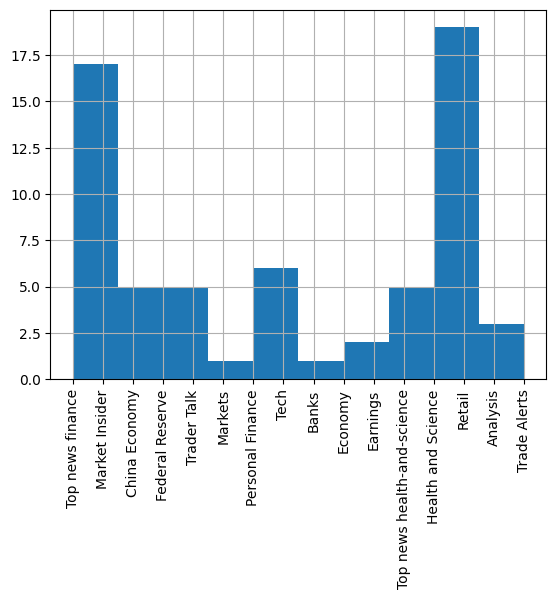

In [ ]:
df['Class'].hist()
plt.xticks(rotation = 90)

array([[<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>]], dtype=object)

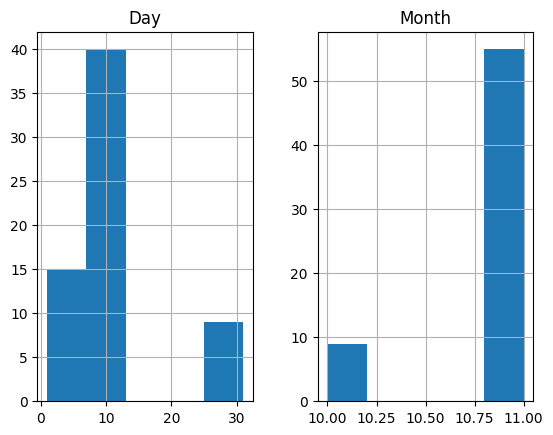

In [ ]:
df.hist(bins = 5)

<Figure size 640x480 with 0 Axes>

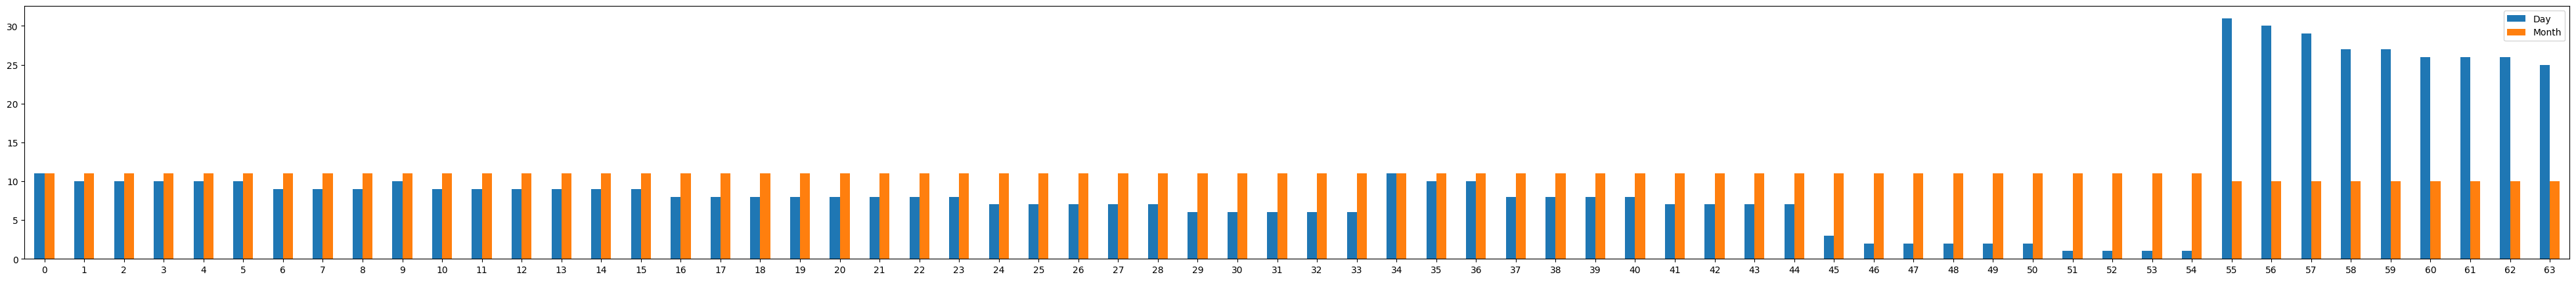

In [ ]:
fig = plt.figure()
df.plot.bar(rot=0,figsize=(50,5))
fig.show()

<Axes: >

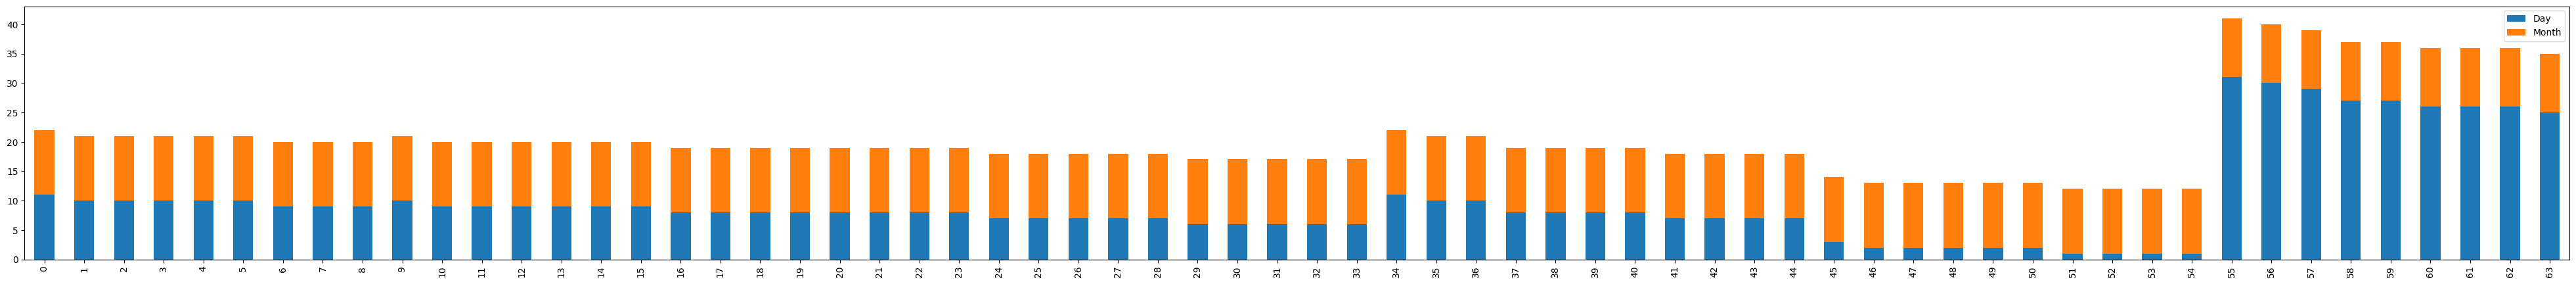

In [ ]:
df.plot.bar(stacked=True,figsize=(50,5))

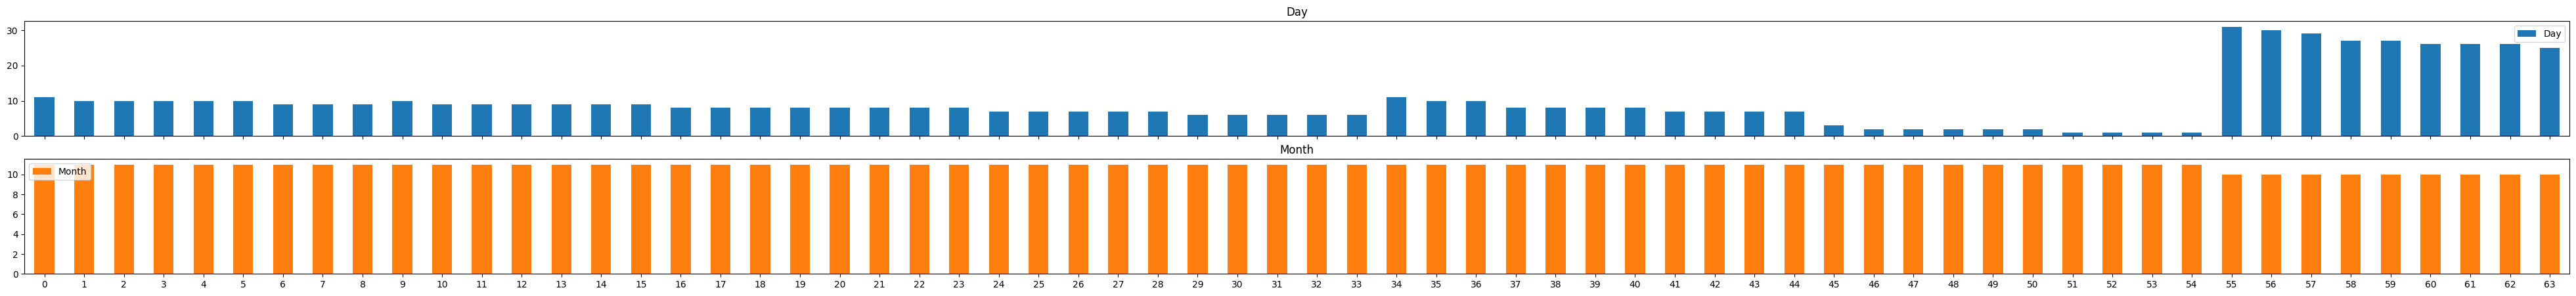

In [ ]:
axes = df.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

<Axes: >

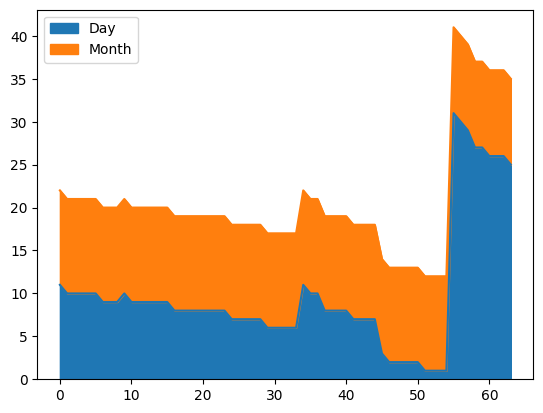

In [ ]:
df.plot.area()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Top news finance'),
  Text(1, 0, 'Market Insider'),
  Text(2, 0, 'China Economy'),
  Text(3, 0, 'Federal Reserve'),
  Text(4, 0, 'Trader Talk'),
  Text(5, 0, 'Markets'),
  Text(6, 0, 'Personal Finance'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Banks'),
  Text(9, 0, 'Economy'),
  Text(10, 0, 'Earnings'),
  Text(11, 0, 'Top news health-and-science'),
  Text(12, 0, 'Health and Science'),
  Text(13, 0, 'Retail'),
  Text(14, 0, 'Analysis'),
  Text(15, 0, 'Trade Alerts')])

<Figure size 640x480 with 0 Axes>

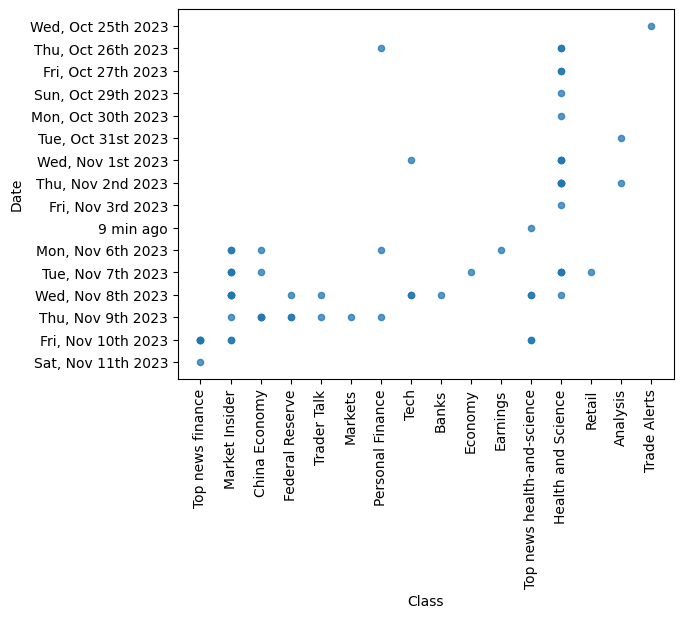

In [ ]:
fig = plt.figure()
df.plot.scatter(x= 'Class', y = 'Date', alpha = 0.75,rot=0)
plt.xticks(rotation=90)

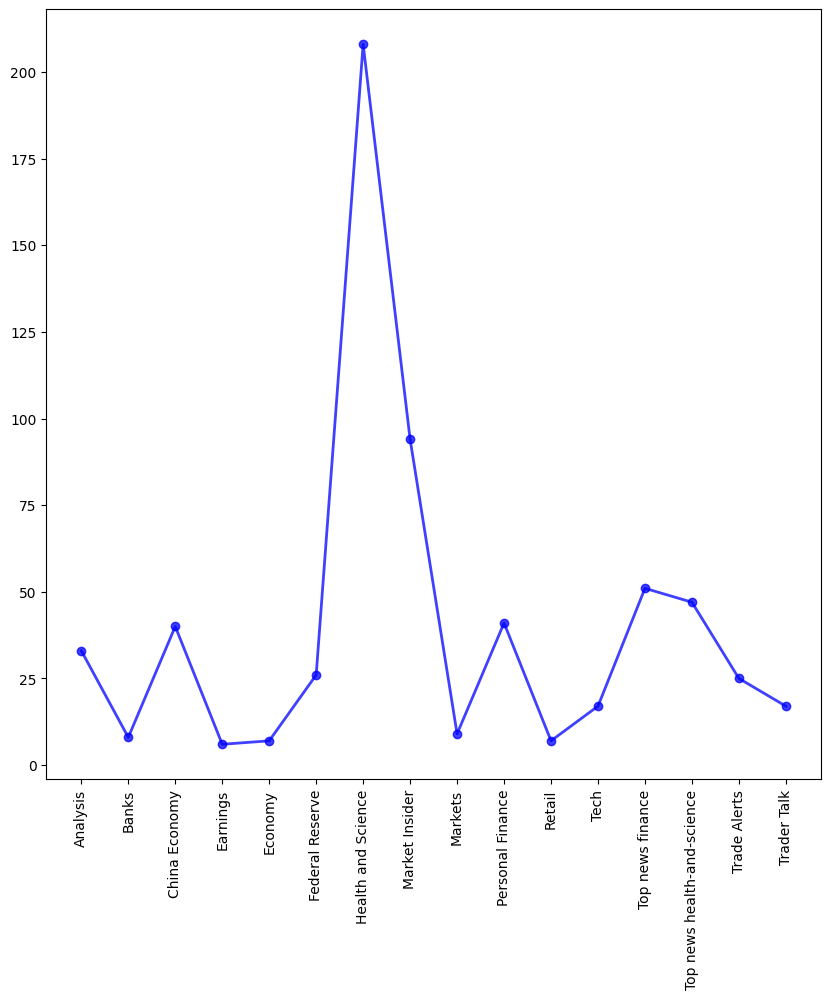

In [ ]:
plt.figure(figsize=[10,10])
plt.plot(df.groupby('Class').Day.sum(),  '-ob', linewidth='2', alpha = 0.75)
plt.xticks(rotation=90)
plt.show()

<Axes: >

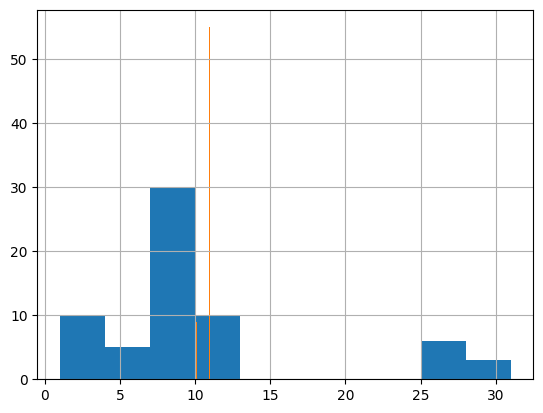

In [ ]:
df['Day'].hist()
df['Month'].hist()

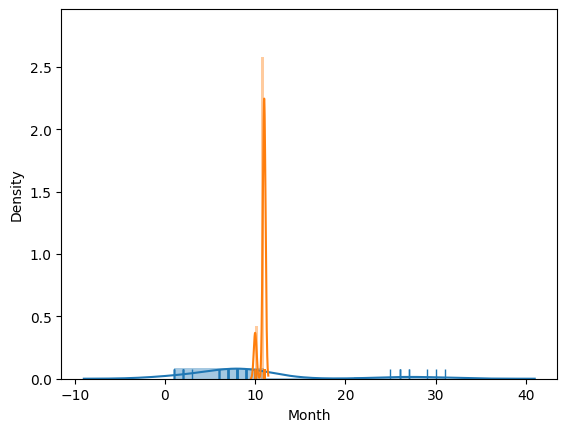

In [ ]:
import seaborn as sns
line_up=sns.distplot(df['Day'], bins=3, kde=True, rug=True,label='Day')

line_down=sns.distplot(df['Month'], bins=3, kde=True, rug=True,label = 'Month')

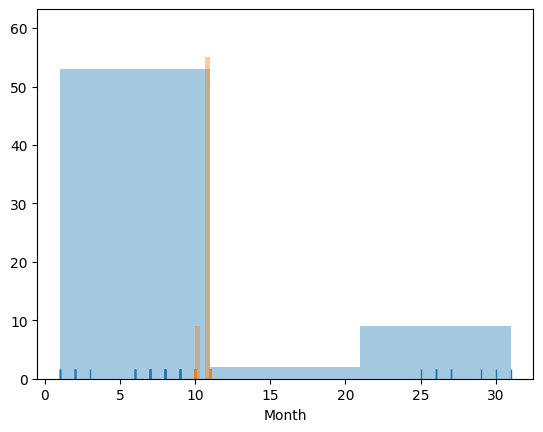

In [ ]:
line_up=sns.distplot(df['Day'], bins=3, kde=False, rug=True,label='Day')

line_down=sns.distplot(df['Month'], bins=3, kde=False, rug=True,label = 'Month')

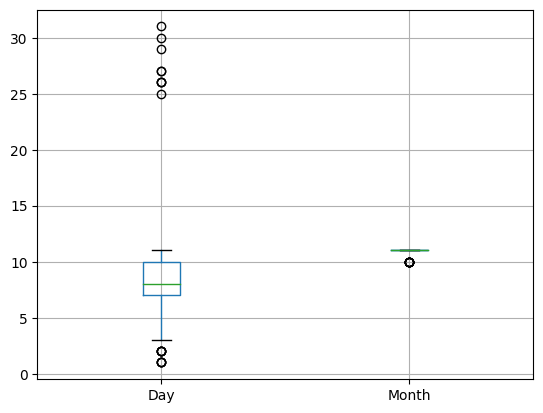

In [ ]:
boxplot = df.boxplot(column=['Day', 'Month'])

In [135]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_data.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_data.csv')
train = train.drop(['case_id'], axis=1)
test = test.drop(['case_id'], axis=1)
train['dataset'] = 'train'
test['dataset'] = 'test'
df = pd.concat([train, test])

In [136]:
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,NaN,test
137053,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,NaN,test
137054,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,NaN,test
137055,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,NaN,test


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310974 entries, 0 to 137056
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      310974 non-null  int64  
 1   Hospital_type_code                 310974 non-null  object 
 2   City_Code_Hospital                 310974 non-null  int64  
 3   Hospital_region_code               310974 non-null  object 
 4   Available Extra Rooms in Hospital  310974 non-null  int64  
 5   Department                         310974 non-null  object 
 6   Ward_Type                          310974 non-null  object 
 7   Ward_Facility_Code                 310974 non-null  object 
 8   Bed Grade                          310874 non-null  float64
 9   patientid                          310974 non-null  int64  
 10  City_Code_Patient                  306671 non-null  float64
 11  Type of Admission                  3109

<Axes: >

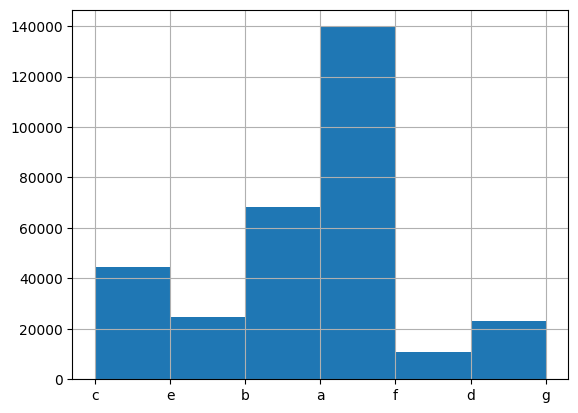

In [140]:
df['Hospital_type_code'].hist(bins = 6)

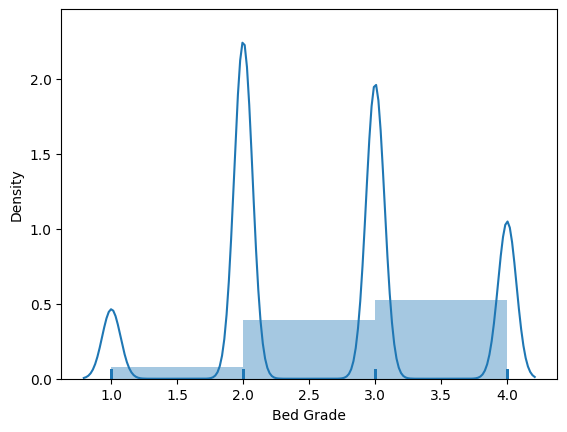

In [139]:
import seaborn as sns
line_up=sns.distplot(df['Bed Grade'], bins=3, kde=True, rug=True)

In [141]:
ds = df.groupby(['Department','Bed Grade'])['patientid'].count().reset_index()
ds.columns = ['Department','Bed Grade', 'count']

In [142]:
ds

,Department,Bed Grade,count
0,TB & Chest disease,1.0,515
1,TB & Chest disease,2.0,3301
2,TB & Chest disease,3.0,3413
3,TB & Chest disease,4.0,2042
4,anesthesia,1.0,314
5,anesthesia,2.0,7042
6,anesthesia,3.0,14125
7,anesthesia,4.0,8259
8,gynecology,1.0,21490
9,gynecology,2.0,99931


<Axes: >

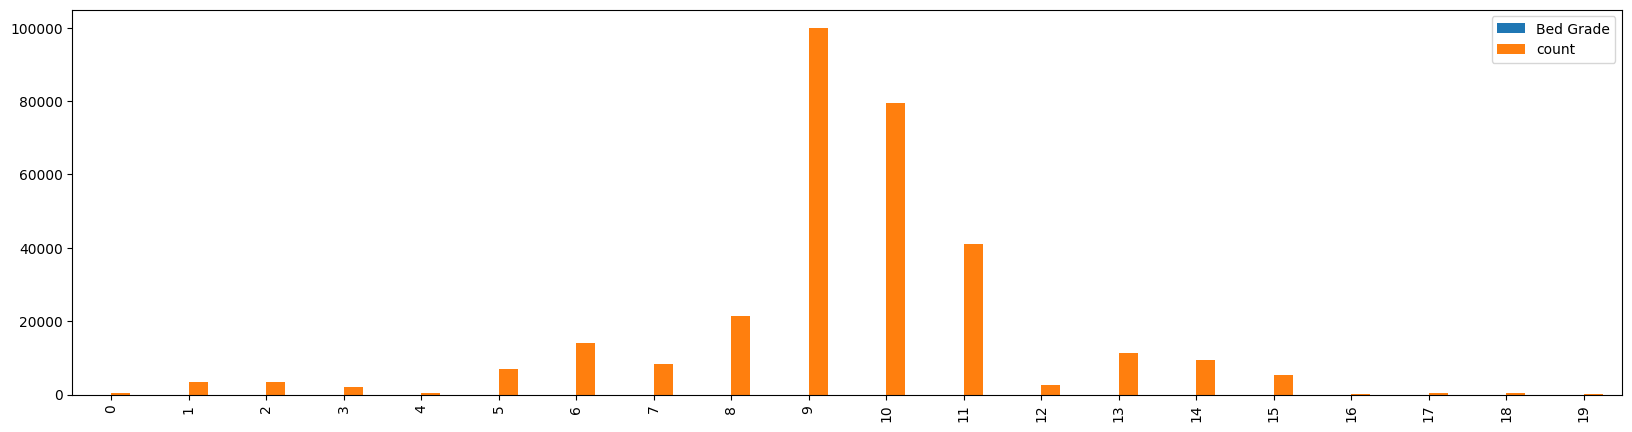

In [143]:
ds.plot.bar(figsize=(20,5))

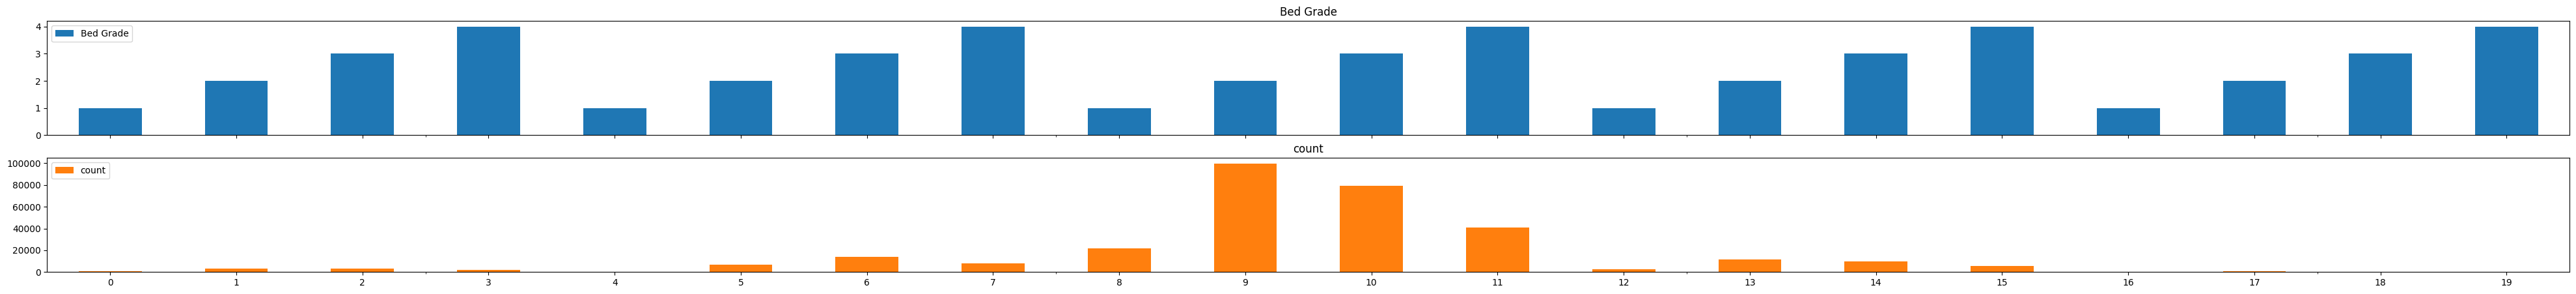

In [144]:
axes = ds.plot.bar(rot=0, subplots=True,figsize=(50,5))
axes[1].legend(loc=2)

<Axes: >

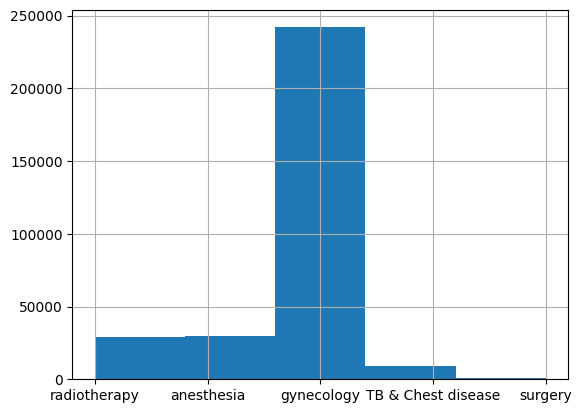

In [146]:
df['Department'].hist(bins = 5)

In [147]:
import plotly.express as px

fig = px.bar(
    ds,
    x='Department',
    y="count",
    color = 'Bed Grade',
    barmode='group',
    orientation='v',
    title='Cases per department distribution',
    width=800,
    height=700
)
fig.show()

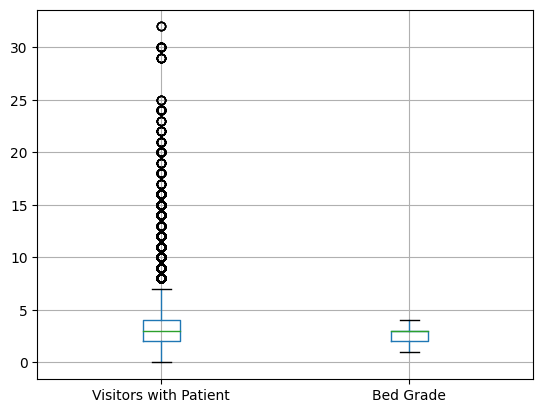

In [148]:
boxplot = df.boxplot(column=['Visitors with Patient', 'Bed Grade'])

In [149]:
ds = df.groupby(['Department','Age'])['patientid'].count().reset_index()
ds.columns = ['Department','Age', 'count']

In [150]:
ds

,Department,Age,count
0,TB & Chest disease,0-10,336
1,TB & Chest disease,11-20,616
2,TB & Chest disease,21-30,1272
3,TB & Chest disease,31-40,1458
4,TB & Chest disease,41-50,1653
5,TB & Chest disease,51-60,1830
6,TB & Chest disease,61-70,1296
7,TB & Chest disease,71-80,691
8,TB & Chest disease,81-90,80
9,TB & Chest disease,91-100,41


In [151]:
fig = px.bar(
    ds,
    x='Department',
    y="count",
    color = 'Age',
    barmode='group',
    orientation='v',
    title='Cases per age distribution',
    width=800,
    height=700
)
fig.show()

In [152]:
ds = df.groupby(['Age','dataset'])['patientid'].count().reset_index()
ds.columns = ['Age','dataset', 'count']

In [153]:
fig = px.bar(
    ds,
    x='Age',
    y="count",
    color = 'dataset',
    barmode='group',
    orientation='v',
    title='Cases per age distribution',
    width=800,
    height=700
)
fig.show()

In [154]:
ds = df.groupby(['Age','Severity of Illness'])['patientid'].count().reset_index()
ds.columns = ['Age','Severity of Illness', 'count']

In [155]:
fig = px.bar(
    ds,
    x='Age',
    y="count",
    color = 'Severity of Illness',
    barmode='group',
    orientation='v',
    title='Cases per age distribution',
    width=800,
    height=700
)
fig.show()